(content:rv:normal)=
# Normal distribution

The *Normal* (or *Gaussian*) distribution is a widely used symmetric continuous probability distribution.

In the following, let $X$ be a random variable that follows a Normal distribution with mean $\mu_X$ and standard deviation $\sigma_X$ , and let $x$ denote a particular outcome of $X$.

In [1]:
import fesslix as flx
flx.load_engine()

import numpy as np
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=174544811;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Syntax

```{eval-rst}
.. py:property:: normal

   Normal distribution

   ``normal`` is a distribution type (:type:`flx_rv_type`) for :ref:`content:rv:basics` in Fesslix.

   Parametrization:
       Parameters of the distribution can be specified as additional key-value pairs in an object of type :type:`flx_rv_config`. 
       The following combinations of parameters are accepted:

         - ``mu``, ``sd``
         - ``cov``, ``val_1``, ``pr_1``
         - ``sd``, ``val_1``, ``pr_1``
         - ``val_1``, ``pr_1``, ``val_2``, ``pr_2``
         
       The interpretation of the parameters is:

         - ``mu`` (*float*): mean value
         - ``sd`` (*float*): standard deviation; only positive values are allowed         
         - ``cov`` (*float*): coefficient of variation; only positive values are allowed 
         - ``val_1`` (*float*): ``pr_1`` quantile
         - ```pr_1`` (:type:`flx_pr`): probability that the value of the distribution is smaller or equal than `val_1`
         - ``val_2`` (*float*): ``pr_2`` quantile
         - ```pr_2`` (:type:`flx_pr`): probability that the value of the distribution is smaller or equal than `val_2`
       
```
**Example:**

In [11]:
rv_1 = flx.rv({'name':'rv_1', 'type':'normal', 'mu':2., 'sd':5. })
rv_2 = flx.rv({'name':'rv_2', 'type':'normal', 'cov':0.1, 'val_1':25., 'pr_1':0.05 })
rv_3 = flx.rv({'name':'rv_3', 'type':'normal', 'sd':2., 'val_1':25., 'pr_1':0.05 })
rv_4 = flx.rv({'name':'rv_4', 'type':'normal', 'val_1':25., 'pr_1':0.05, 'val_2':32., 'pr_2':0.5 })
rv_lst = [ rv_1, rv_2, rv_3, rv_4 ]

## Properties

Notation
: $X\sim\mathcal{N}(\mu_X,\sigma_X)$

Parameters
: $\mu_X\in\mathbb{R}$, $\sigma_X\in(0,\infty)$

Support
: $x\in\mathbb{R}$

Mean
: $\mu_X$

Standard deviation
: $\sigma_X$

Median
: $\mu_X$

Mode
: $\mu_X$

Skewness
: *zero*

Excess kurtosis
: *zero*

Entropy
: $\frac{1}{2}\ln\left(2\pi e {\sigma_X}^2\right)$

## PDF

The PDF $f_X(x)$ of the *Normal* distribution is commonly expressed in terms of the PDF of the {ref}`content:rv:stdn` $\varphi(\cdot)$:

$$f_X(x) = \frac{1}{\sigma_X} \cdot\varphi\left(\frac{x-\mu_X}{\sigma_X}\right)$$

The PDF of a *Normal* distribution can also be expressed as:

$$f_X(x) = c \cdot\exp\left(-\lambda_1 x - \lambda_2 x^2\right)$$

where the mean, standard deviation and scaling constant are:

$$\mu = -\frac{\lambda_1}{2\lambda_2}$$
$$\lambda_1 = - \frac{\mu}{\sigma^2}$$
$$\sigma = \frac{1}{\sqrt{2\lambda_2}}$$
$$\lambda_2 = \frac{1}{2 \sigma^2}$$
$$c = \sqrt{\frac{\lambda_2}{\pi}} \cdot\exp\left(-\frac{\lambda_1^2}{4\lambda_2}\right)$$

From the equations above, it follows that $\lambda_2$ must be positive.

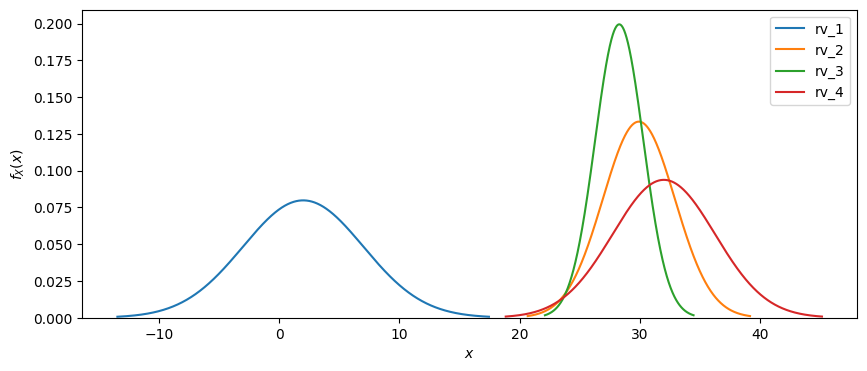

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_pdf(ax, rv, config_dict={'label':rv.get_name()}) 

ax.set_ylim([0., None])
plt.xlabel(r"$x$")
plt.ylabel(r"$f_X(x)$")
plt.legend()
plt.show()

## CDF

The CDF $F_X(x)$ of the *Normal* distribution is typically expressed in terms of the CDF of the {ref}`content:rv:stdn` $\Phi(\cdot)$:

$$F_X(x) = \Phi\left(\frac{x-\mu_X}{\sigma_X}\right)$$

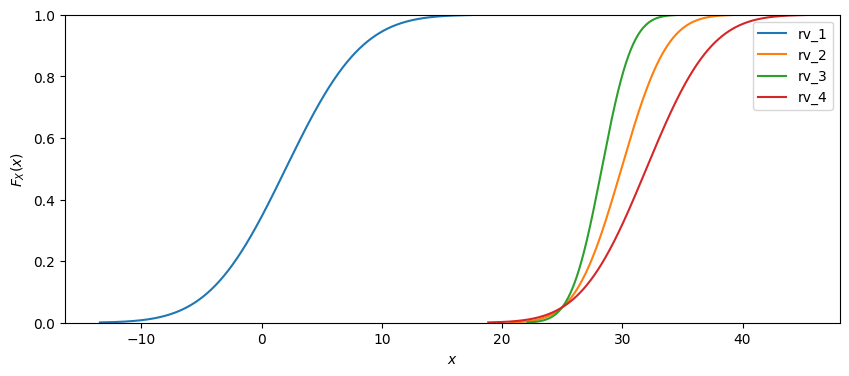

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_cdf(ax, rv, config_dict={'label':rv.get_name()}) 
    
ax.set_ylim([0., 1.])
plt.xlabel(r"$x$")
plt.ylabel(r"$F_X(x)$")
plt.legend()
plt.show()

## Quantile function

The *quantile function* of the *Normal* distribution is: 

$$F_X^{-1}(p) = \mu_X + \sigma_X \cdot\Phi^{-1}(p) \;, \quad p\in(0,1)$$

where $\Phi^{-1}(\cdot)$ is the quantile function of the standard Normal distribution.

## Standardizing Normal random variables

The *Normal* random variable $X$ can be transformed to a {ref}`content:rv:stdn` $U$ through:

$$U = \frac{X-\mu_X}{\sigma_X}$$

Conversely, a Normal random variable $X$ with mean $\mu_X$ and standard deviation $\sigma_X$ can be generated from a standard Normal variable as:

$$X = \mu_X + \sigma_X \cdot U$$